In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



haberman = pd.read_csv("haberman.csv")

#Observations
#column names not present in the date so names were added for better understanding
# entire data set has 4 coloumns and all 4 coloumns are numeric value
# 

In [5]:
print (haberman.columns)

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')


In [6]:
# total number of patients at particular age when the cancer detected
haberman['Age'].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: Age, dtype: int64

In [9]:
haberman['Surv_status'].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

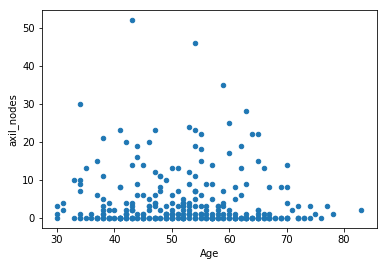

In [13]:
haberman.plot(kind='scatter', x='Age', y='axil_nodes') ;
plt.show()

In [14]:
haberman['Op_Year'].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: Op_Year, dtype: int64

In [15]:
haberman.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


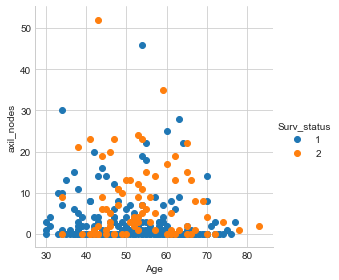

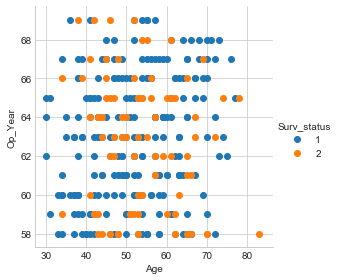

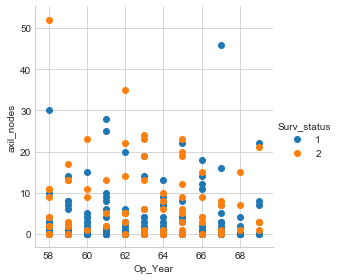

In [54]:
#2D scatter plot.
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", size=4).map(plt.scatter, "Age", "axil_nodes").add_legend();
plt.show();
sns.FacetGrid(haberman, hue="Surv_status", size=4).map(plt.scatter, "Age", "Op_Year").add_legend();
plt.show();
sns.FacetGrid(haberman, hue="Surv_status", size=4).map(plt.scatter, "Op_Year", "axil_nodes").add_legend();
plt.show();

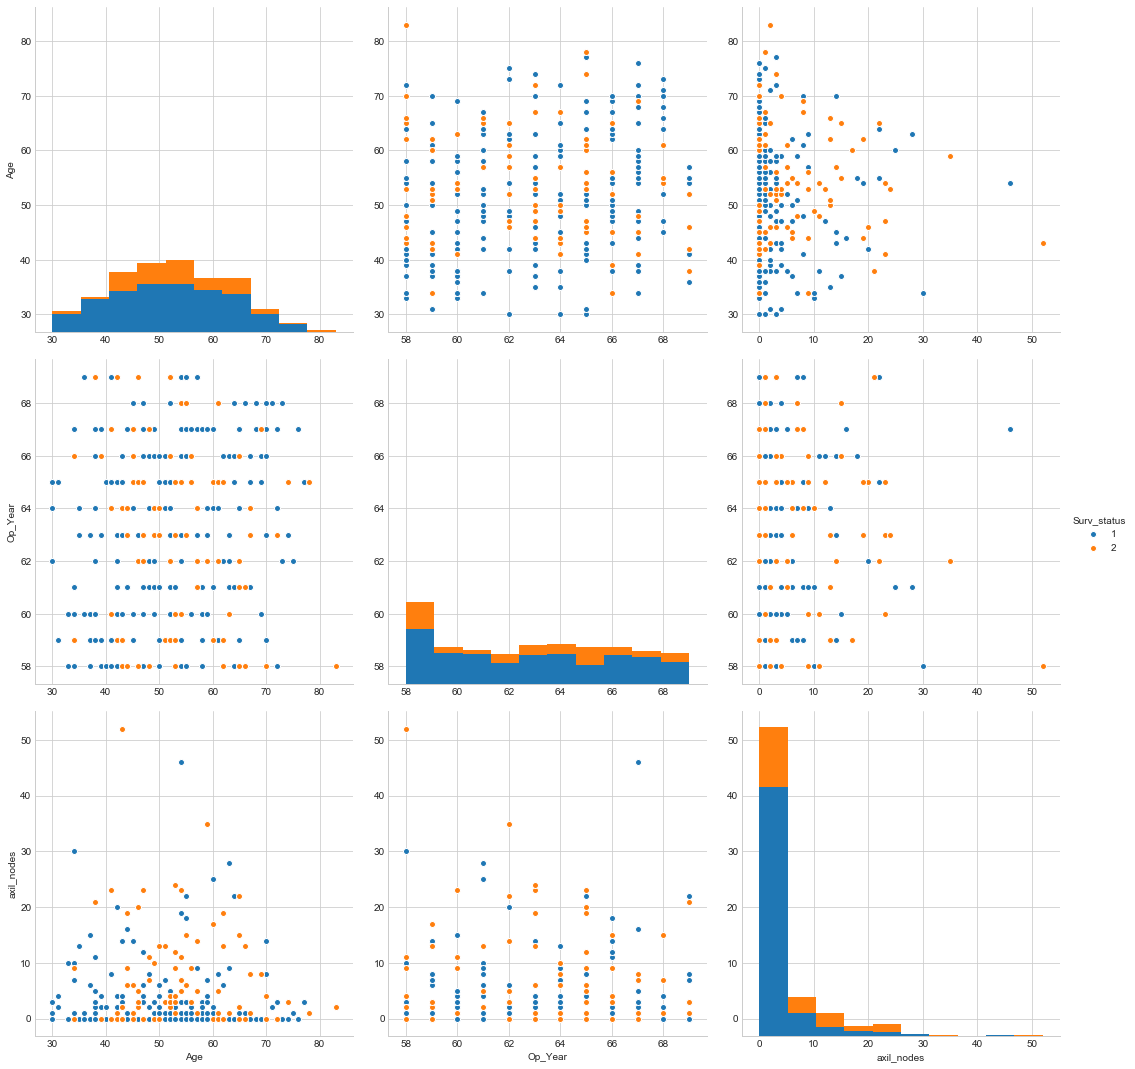

In [35]:
#pairplots
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Surv_status", vars=['Age', 'Op_Year', 'axil_nodes'], size=5);
plt.show()

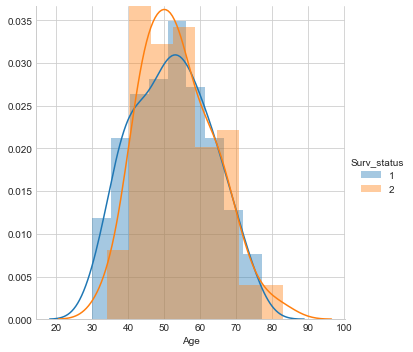

In [25]:
#histograms
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

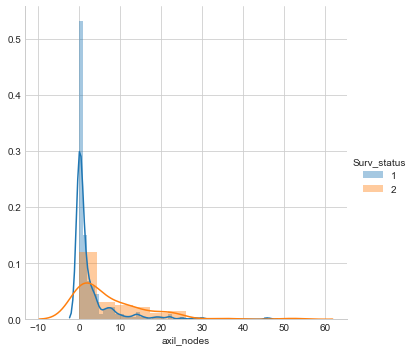

In [26]:
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.show();

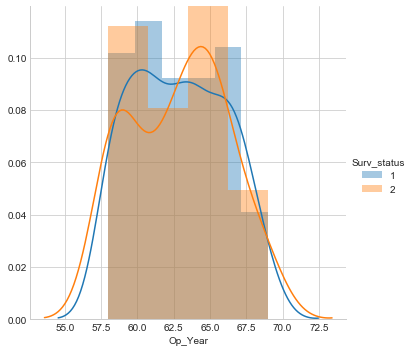

In [27]:
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.show();

pdf node : [ 0.03703704  0.12345679  0.19753086  0.19753086  0.13580247  0.12345679
  0.09876543  0.04938272  0.02469136  0.01234568]
bin edges: [ 34.   38.9  43.8  48.7  53.6  58.5  63.4  68.3  73.2  78.1  83. ]


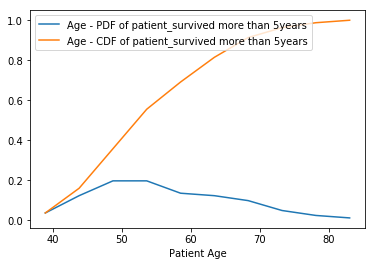

In [31]:
patient_survived_more_than_5years = haberman[haberman['Surv_status'] ==2];
patient_survived_less_than_5years = haberman[haberman['Surv_status'] == 1];

counts, bin_edges = np.histogram(patient_survived_more_than_5years['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

print("pdf node : {0}".format(pdf));
print("bin edges: {0}".format(bin_edges));
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf ,label= "Age - PDF of patient_survived more than 5years");
plt.plot(bin_edges[1:], cdf, label= "Age - CDF of patient_survived more than 5years")
plt.xlabel("Patient Age") 
plt.legend(loc = "upper left")
plt.show();


pdf node : [ 0.05333333  0.10666667  0.12444444  0.09333333  0.16444444  0.16444444
  0.09333333  0.11111111  0.06222222  0.02666667]
bin edges: [ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]


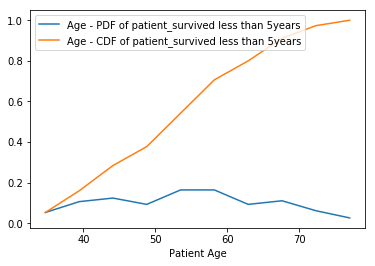

In [32]:
counts, bin_edges = np.histogram(patient_survived_less_than_5years['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

print("pdf node : {0}".format(pdf));
print("bin edges: {0}".format(bin_edges));
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf ,label= "Age - PDF of patient_survived less than 5years");
plt.plot(bin_edges[1:], cdf, label= "Age - CDF of patient_survived less than 5years")
plt.xlabel("Patient Age") 
plt.legend(loc = "upper left")
plt.show();

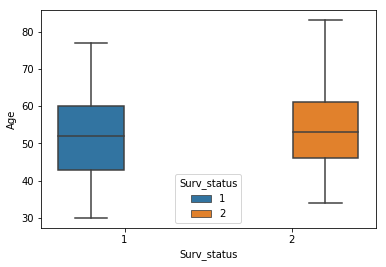

In [10]:
sns.boxplot(x='Surv_status',y='Age', hue = "Surv_status",data=haberman)
plt.show()


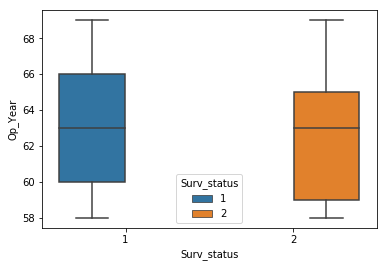

In [14]:
sns.boxplot(x='Surv_status',y='Op_Year', hue = "Surv_status",data=haberman)
plt.show()